In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor

In [4]:
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [5]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df_test.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

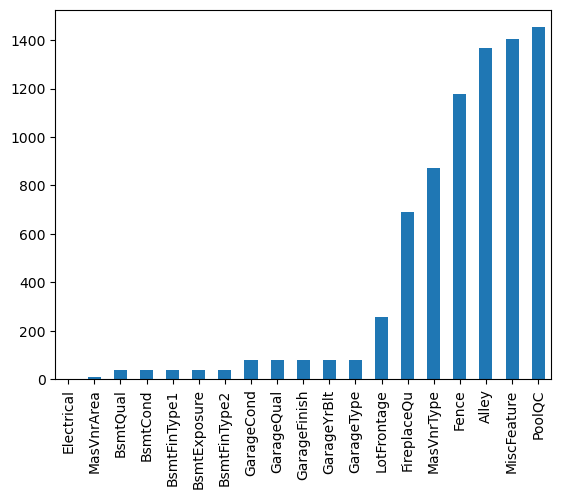

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64


In [9]:
#Missing_values
df_missing = df.isnull().sum()
df_missing = df_missing[df_missing > 0]
df_missing.sort_values(inplace=True)
df_missing.plot.bar()
plt.show()
print(df_missing.sort_values(ascending=False))

In [10]:
df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace=True)
df_test.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace=True)

In [11]:
#separrate the numerical and categorical columns
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

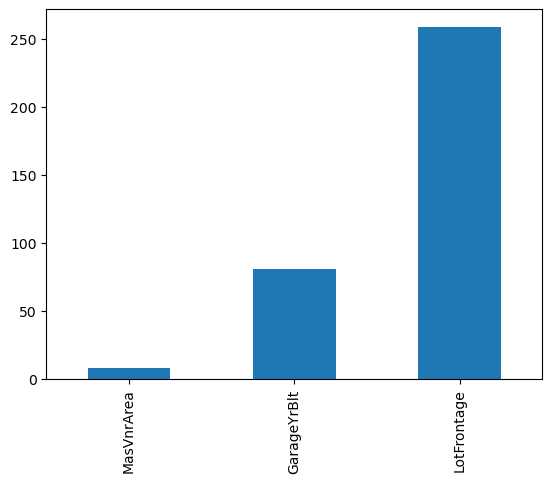

In [12]:
#missing value in nummeric features
df_num = df[numeric_features]
df_num_missing = df_num.isnull().sum()
df_num_missing = df_num_missing[df_num_missing > 0]
df_num_missing.sort_values(inplace=True)
df_num_missing.plot.bar()
plt.show()

In [13]:
# Fill missing numerical values with the mean
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean())
 #for df_test
df_test['LotFrontage'] = df_test['LotFrontage'].fillna(df_test['LotFrontage'].mean())
df_test['GarageYrBlt'] = df_test['GarageYrBlt'].fillna(df_test['GarageYrBlt'].mean())
df_test['MasVnrArea'] = df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].mean())

In [14]:
from sklearn.impute import SimpleImputer

# Impute missing values for categorical features with the most frequent value
imputer = SimpleImputer(strategy='most_frequent')
df[categorical_features] = imputer.fit_transform(df[categorical_features])
df_test[categorical_features] = imputer.transform(df_test[categorical_features])

In [15]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

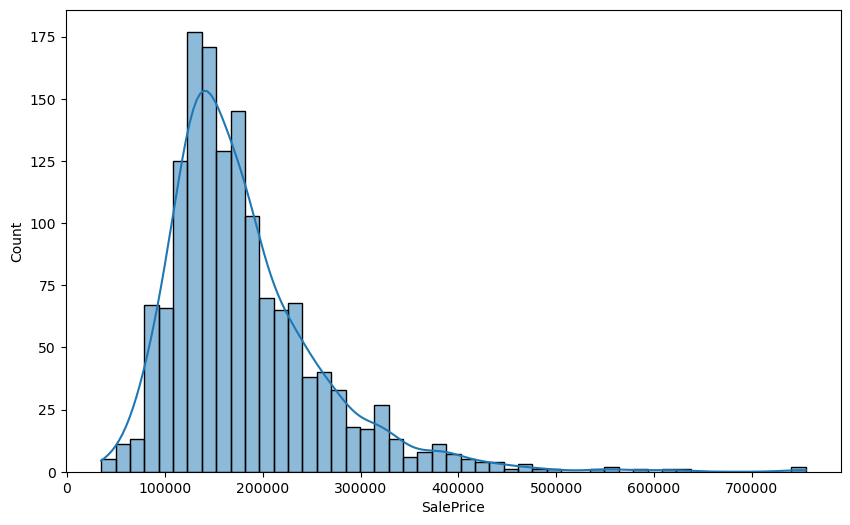

In [16]:
#EDA

plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True)
plt.show()

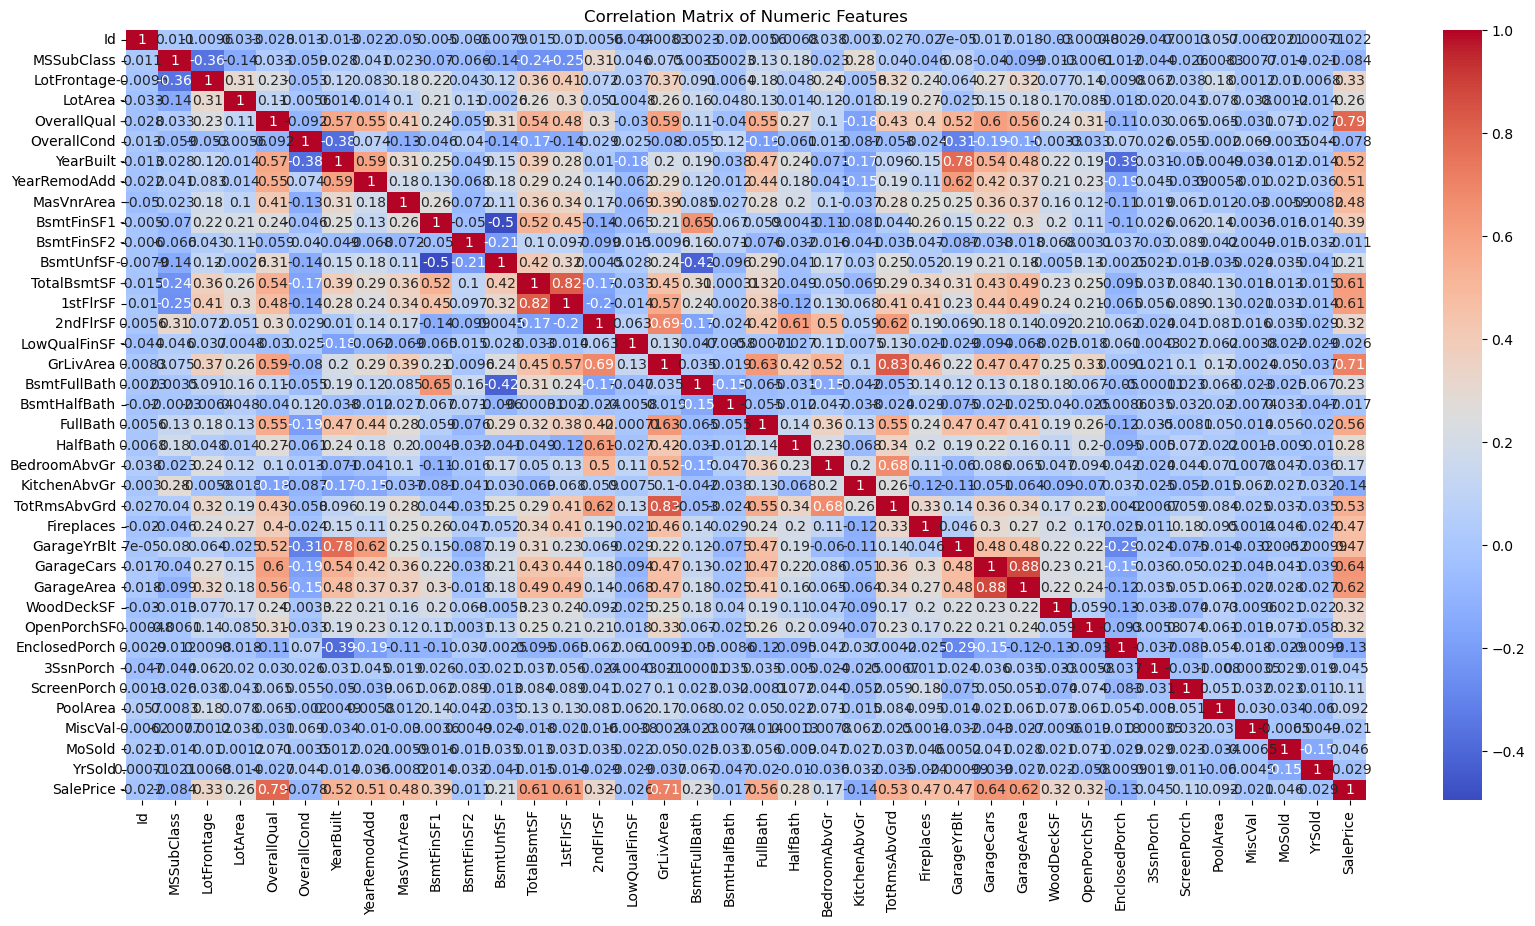

In [17]:
corr_matrix = df[numeric_features].corr()

# Plot the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

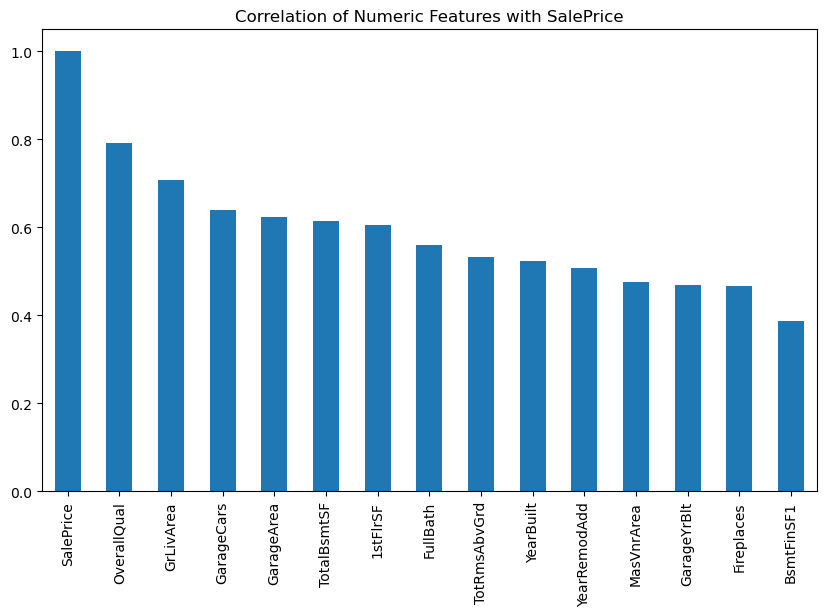

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.475241
GarageYrBlt     0.470177
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64


In [18]:
# correlation of all features with SalePrice
correlation_with_saleprice = df[numeric_features].corr()['SalePrice'].sort_values(ascending=False) 


plt.figure(figsize=(10, 6))
correlation_with_saleprice.head(15).plot(kind='bar')
plt.title('Correlation of Numeric Features with SalePrice')
plt.show()
print(correlation_with_saleprice.head(15))

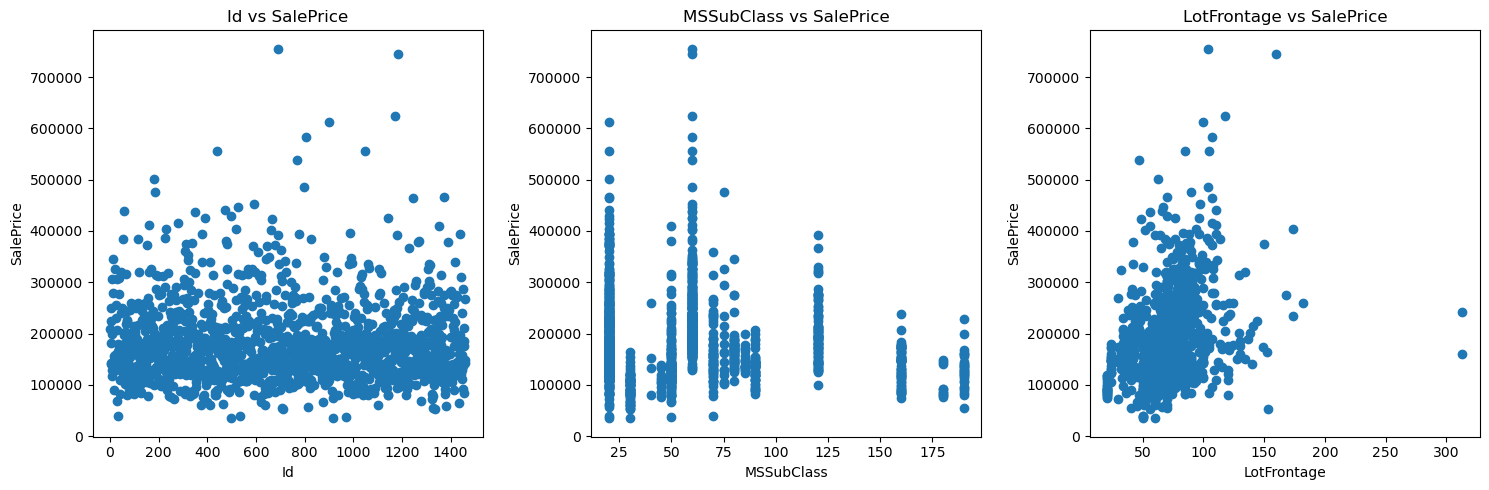

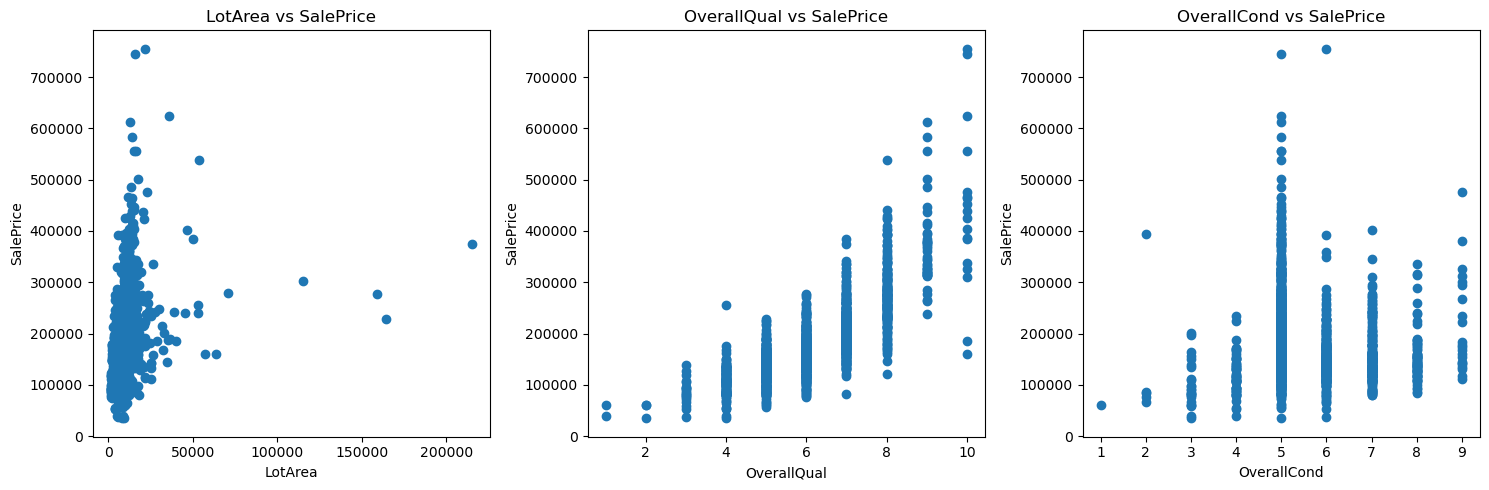

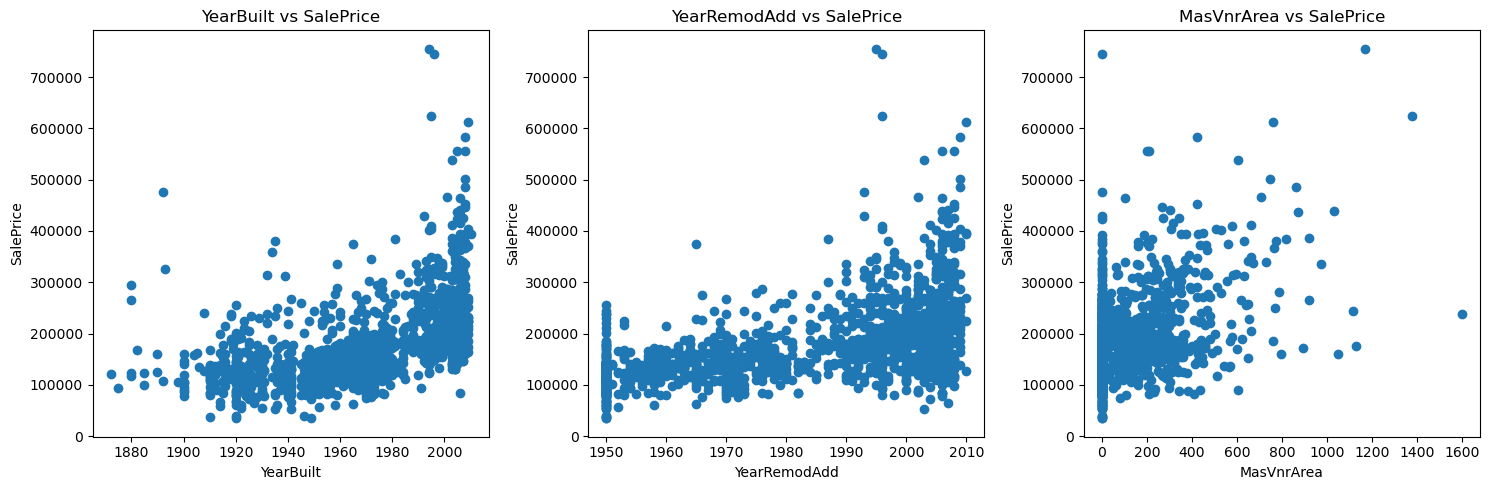

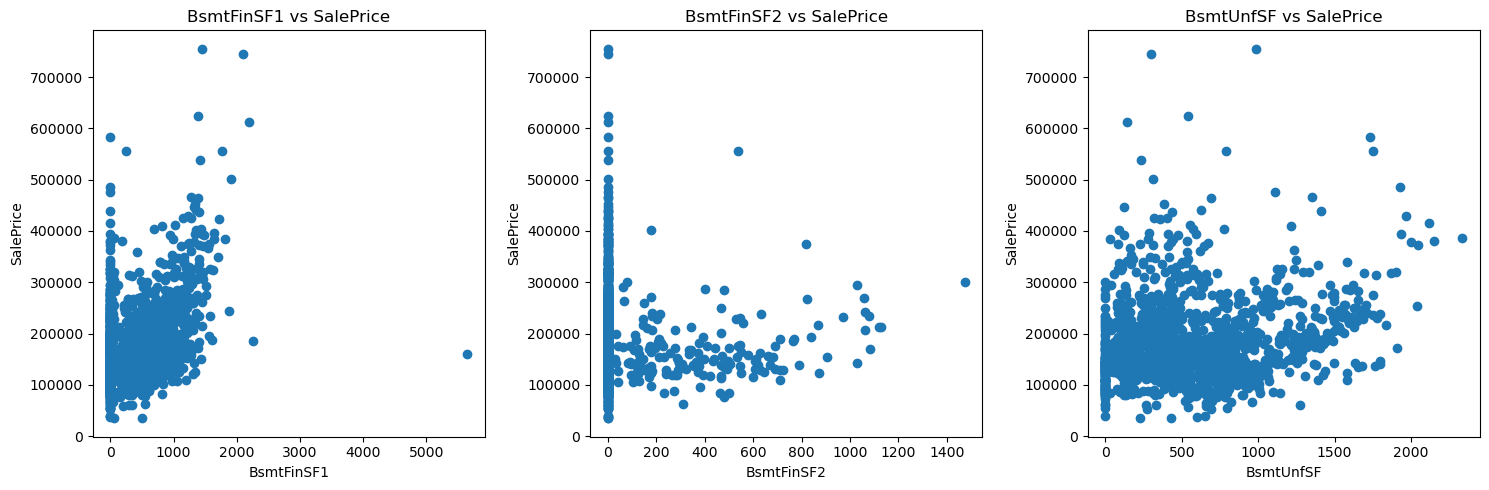

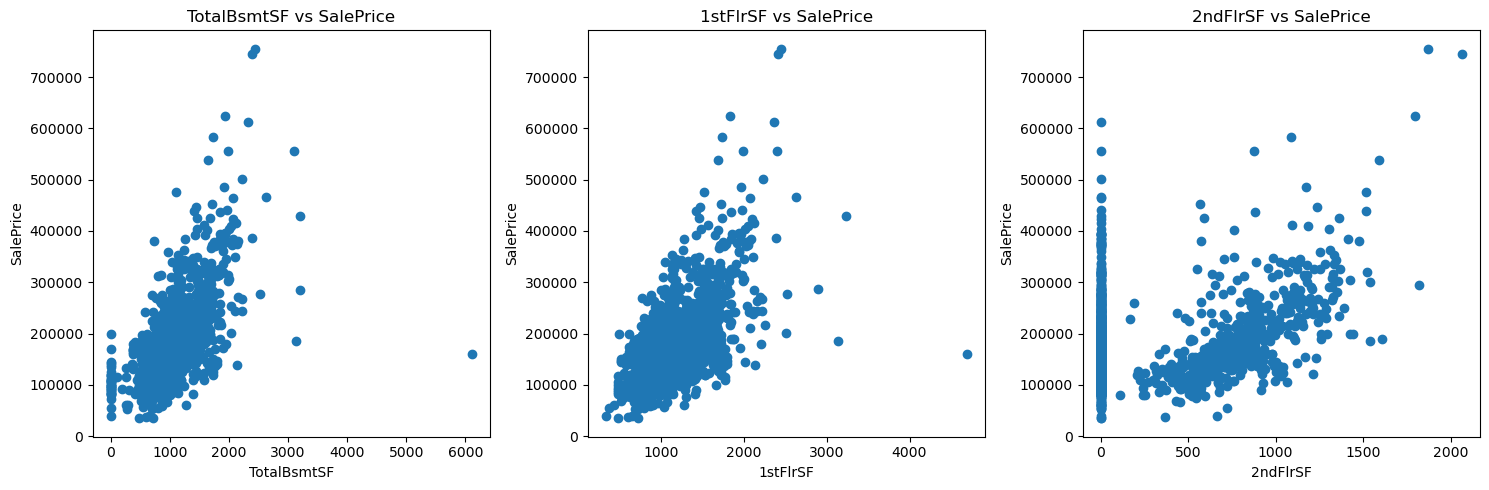

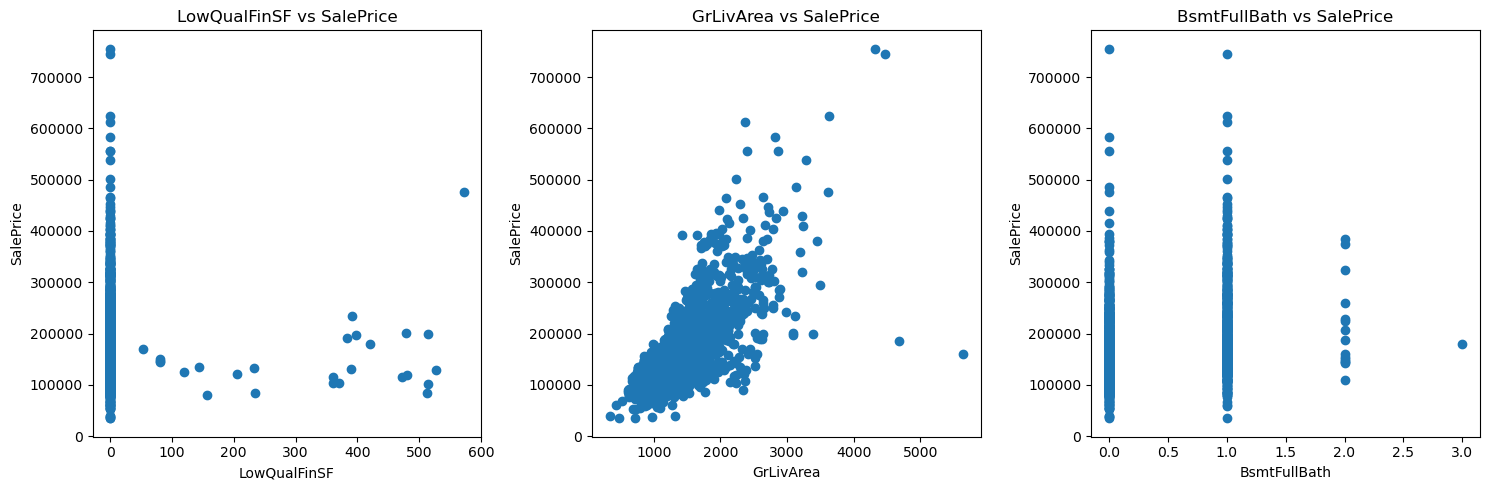

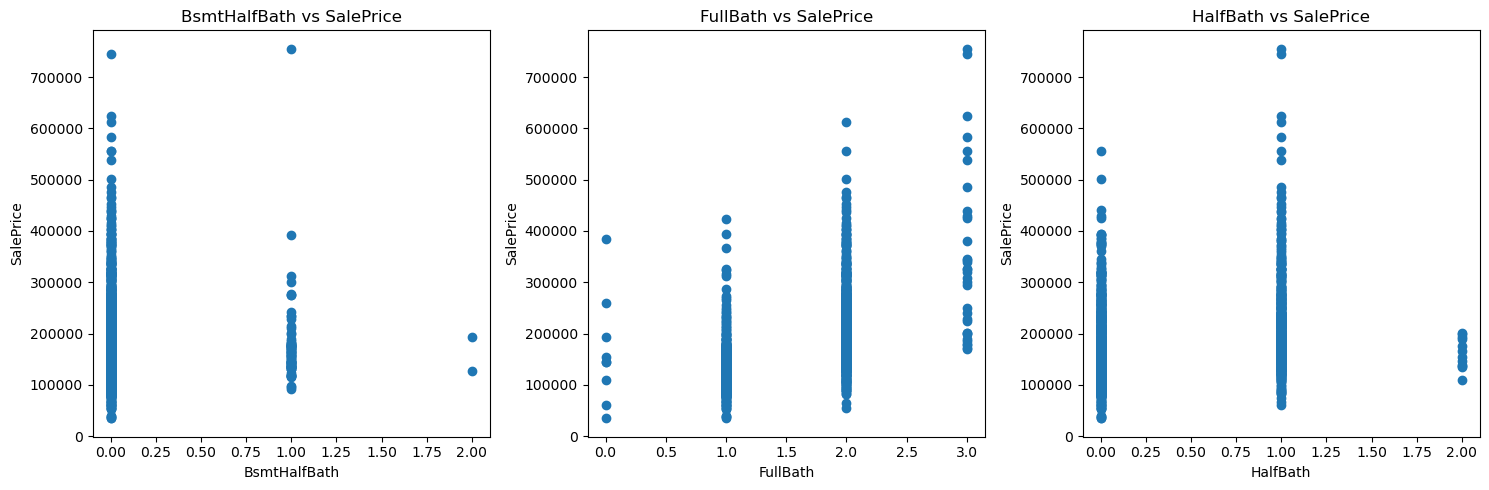

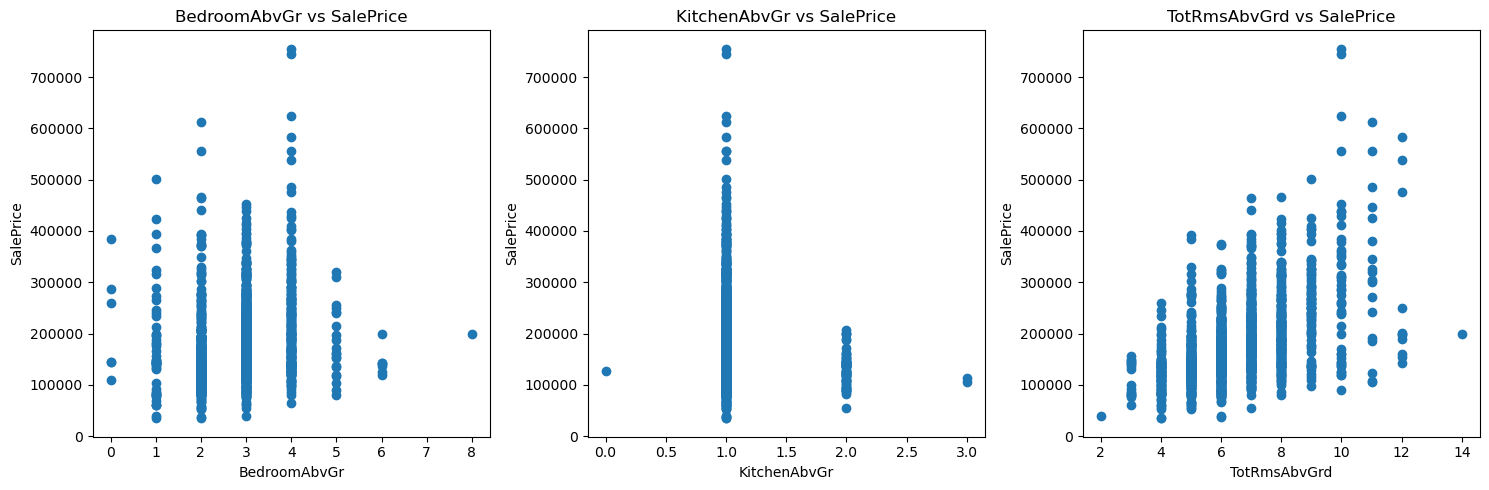

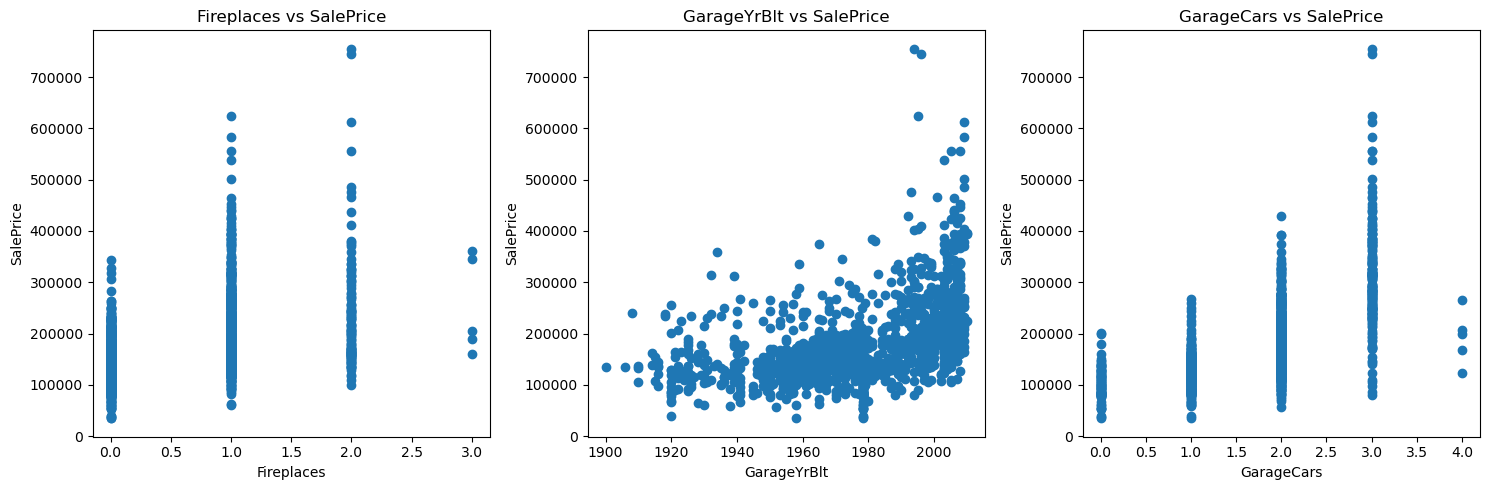

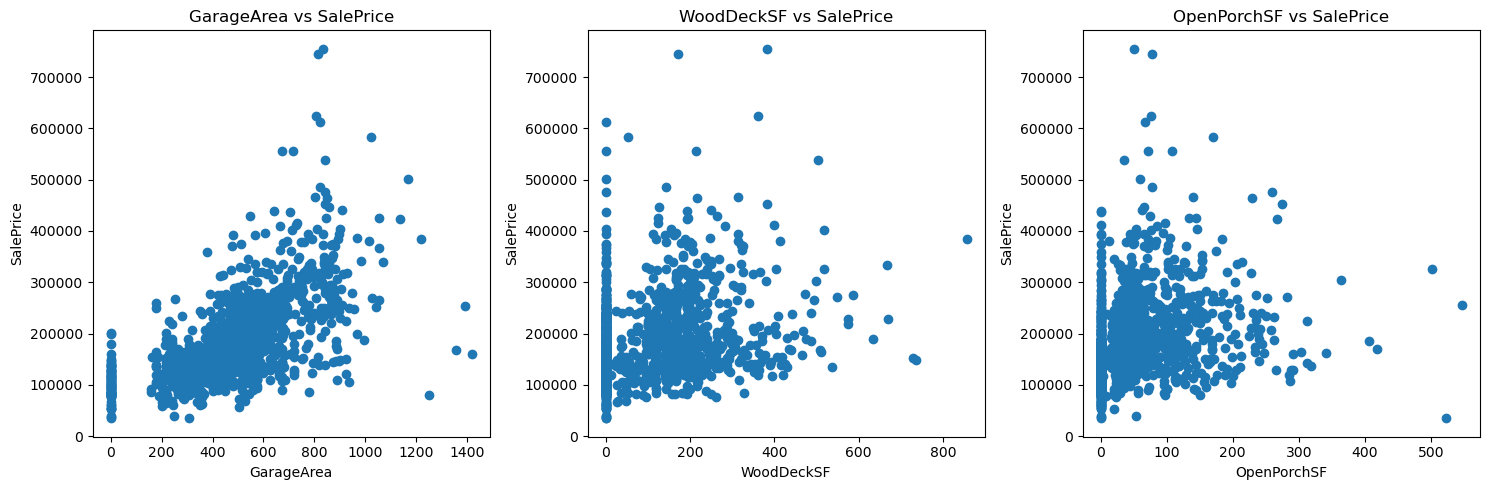

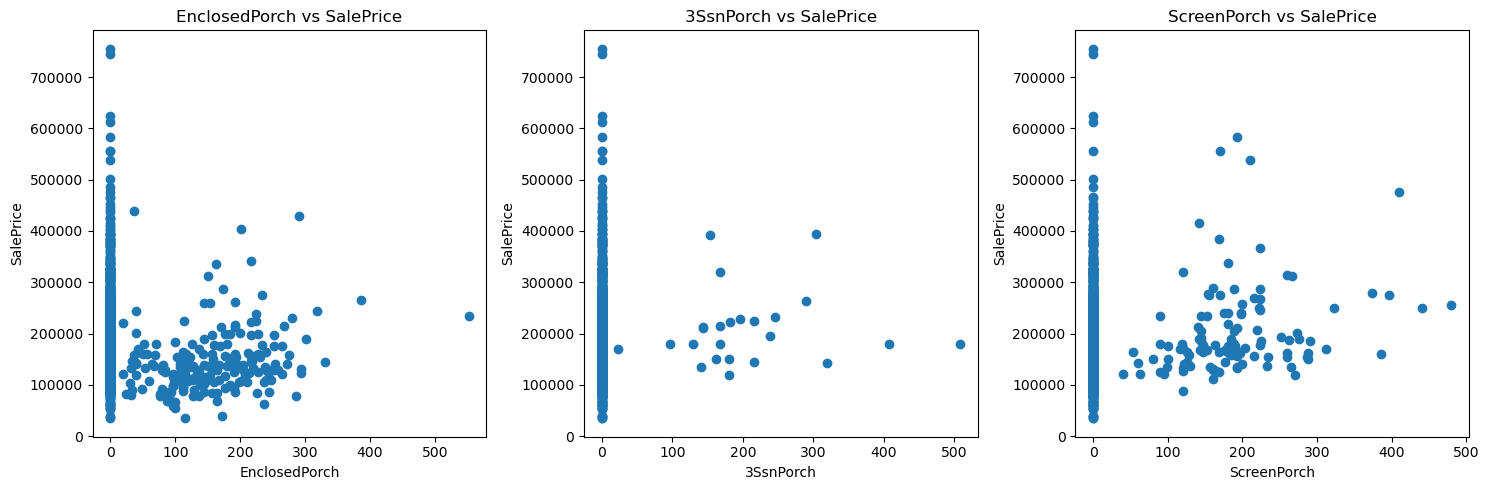

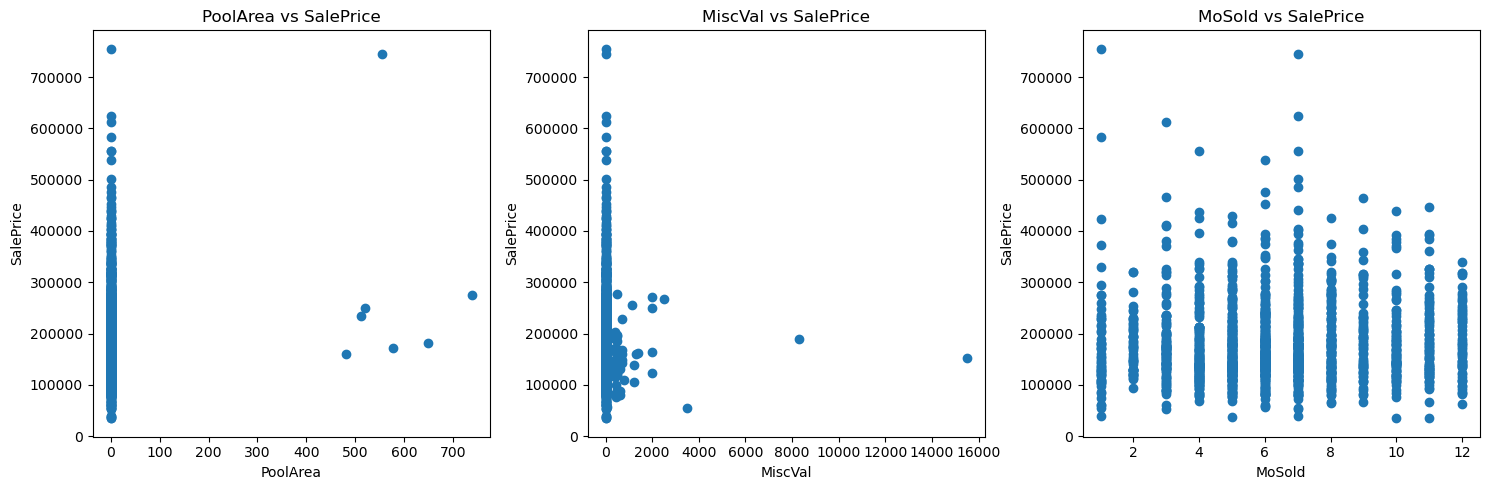

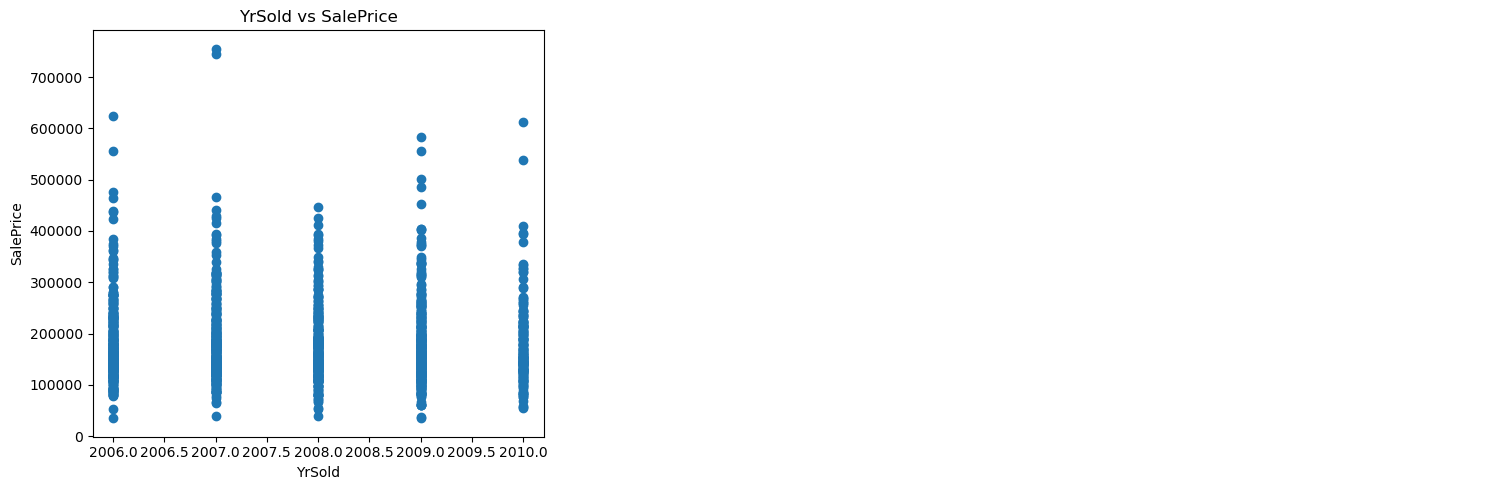

In [19]:
numerical_columns = numeric_features.drop('SalePrice')
plots_per_row = 3
num_plots = len(numerical_columns)

for i in range(0, num_plots, plots_per_row):
    fig, axes = plt.subplots(1, plots_per_row, figsize=(15, 5))  # Create subplots
    
    for j in range(plots_per_row):
        if i + j < num_plots:
            ax = axes[j]
            col = numerical_columns[i + j]
            ax.scatter(df[col], df['SalePrice'])
            ax.set_xlabel(col)
            ax.set_ylabel('SalePrice')
            ax.set_title(f'{col} vs SalePrice')
        else:
            axes[j].axis('off')  # Hide empty subplot
    
    plt.tight_layout()
    plt.show()


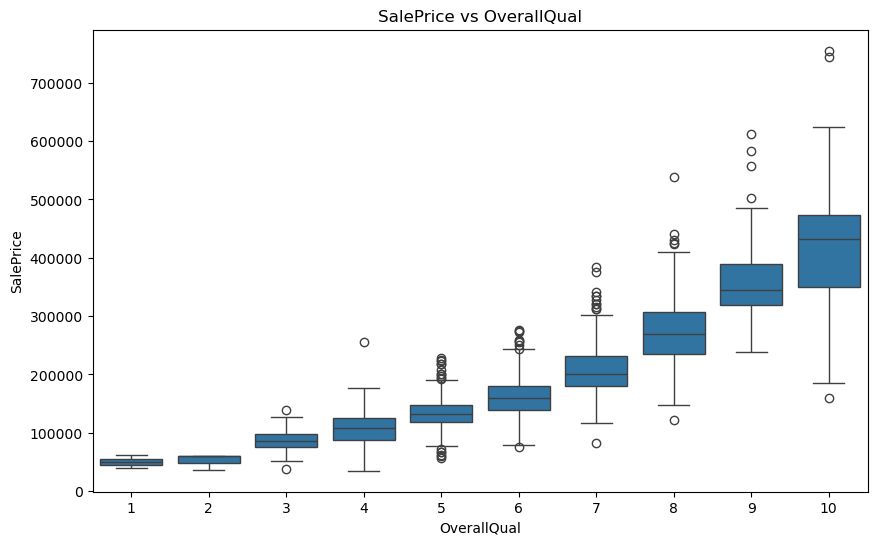

In [20]:
#boxplot for SalePrice vs OverallQual
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.title('SalePrice vs OverallQual')
plt.show()

In [21]:
from sklearn.preprocessing import LabelEncoder
# Encode categorical columns
label_encoders = {}
for column in categorical_features:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

for column in categorical_features:
    le = label_encoders[column]
    df_test[column] = le.transform(df_test[column])


In [22]:
#Target and Features

X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [23]:
print(df.shape, df_test.shape)

(1460, 76) (1459, 75)


In [24]:
#Train & Valid split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
#Define Models

xgb_model = XGBRegressor()

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the validation set
y_pred_xgb = xgb_model.predict(X_val)
y_test_pred = xgb_model.predict(df_test)

# Evaluate the model
r2_xgb = r2_score(y_val, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_val, y_pred_xgb))
#mae_xgb = mean_absolute_error(y_val, y_pred_xgb)

print(f'XGBoost R2 Score: {r2_xgb}')
print(f'XGBoost RMSE: $ {rmse_xgb:.2f}')
#print(f'XGBoost MAE: {mae_xgb}')

XGBoost R2 Score: 0.9064902976365999
XGBoost RMSE: $ 26781.52


In [26]:
rmse = np.sqrt(mean_squared_error(np.log(y_val), np.log(y_pred_xgb)))
print(f'Validation RMSE: {rmse}')

Validation RMSE: 0.1514741260628848


In [27]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the validation set
y_pred_rf = rf_model.predict(X_val)
#y_test_pred_rf = rf_model.predict(df_test)

# Evaluate the model
r2_rf = r2_score(y_val, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_val, y_pred_rf))
#mae_rf = mean_absolute_error(y_val, y_pred_rf)

print(f'RandomForest R2 Score: {r2_rf}')
print(f'RandomForest RMSE: $ {rmse_rf:.2f}')
#print(f'RandomForest MAE: {mae_rf}')

RandomForest R2 Score: 0.8924920274118855
RandomForest RMSE: $ 28716.22


In [28]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
logistic_model.fit(X_train, y_train)

# Predict on the validation set
y_pred_logistic = logistic_model.predict(X_val)

# Evaluate the model
r2_logistic = r2_score(y_val, y_pred_logistic)
rmse_logistic = np.sqrt(mean_squared_error(y_val, y_pred_logistic))
#mae_logistic = mean_absolute_error(y_val, y_pred_logistic)

print(f'Logistic Regression R2 Score: {r2_logistic}')
print(f'Logistic Regression RMSE: $ {rmse_logistic:.2f}')
#print(f'Logistic Regression MAE: {mae_logistic}')

Logistic Regression R2 Score: 0.5897506339528593
Logistic Regression RMSE: $ 56095.87


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Predict on the validation set
y_pred_lr = lr_model.predict(X_val)

# Evaluate the model
r2_lr = r2_score(y_val, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_val, y_pred_lr))
#mae_lr = mean_absolute_error(y_val, y_pred_lr)

print(f'Linear Regression R2 Score: {r2_lr}')
print(f'Linear Regression RMSE: $ {rmse_lr:.2f}')
#print(f'Linear Regression MAE: {mae_lr}')

Linear Regression R2 Score: 0.8452333430488532
Linear Regression RMSE: $ 34454.47


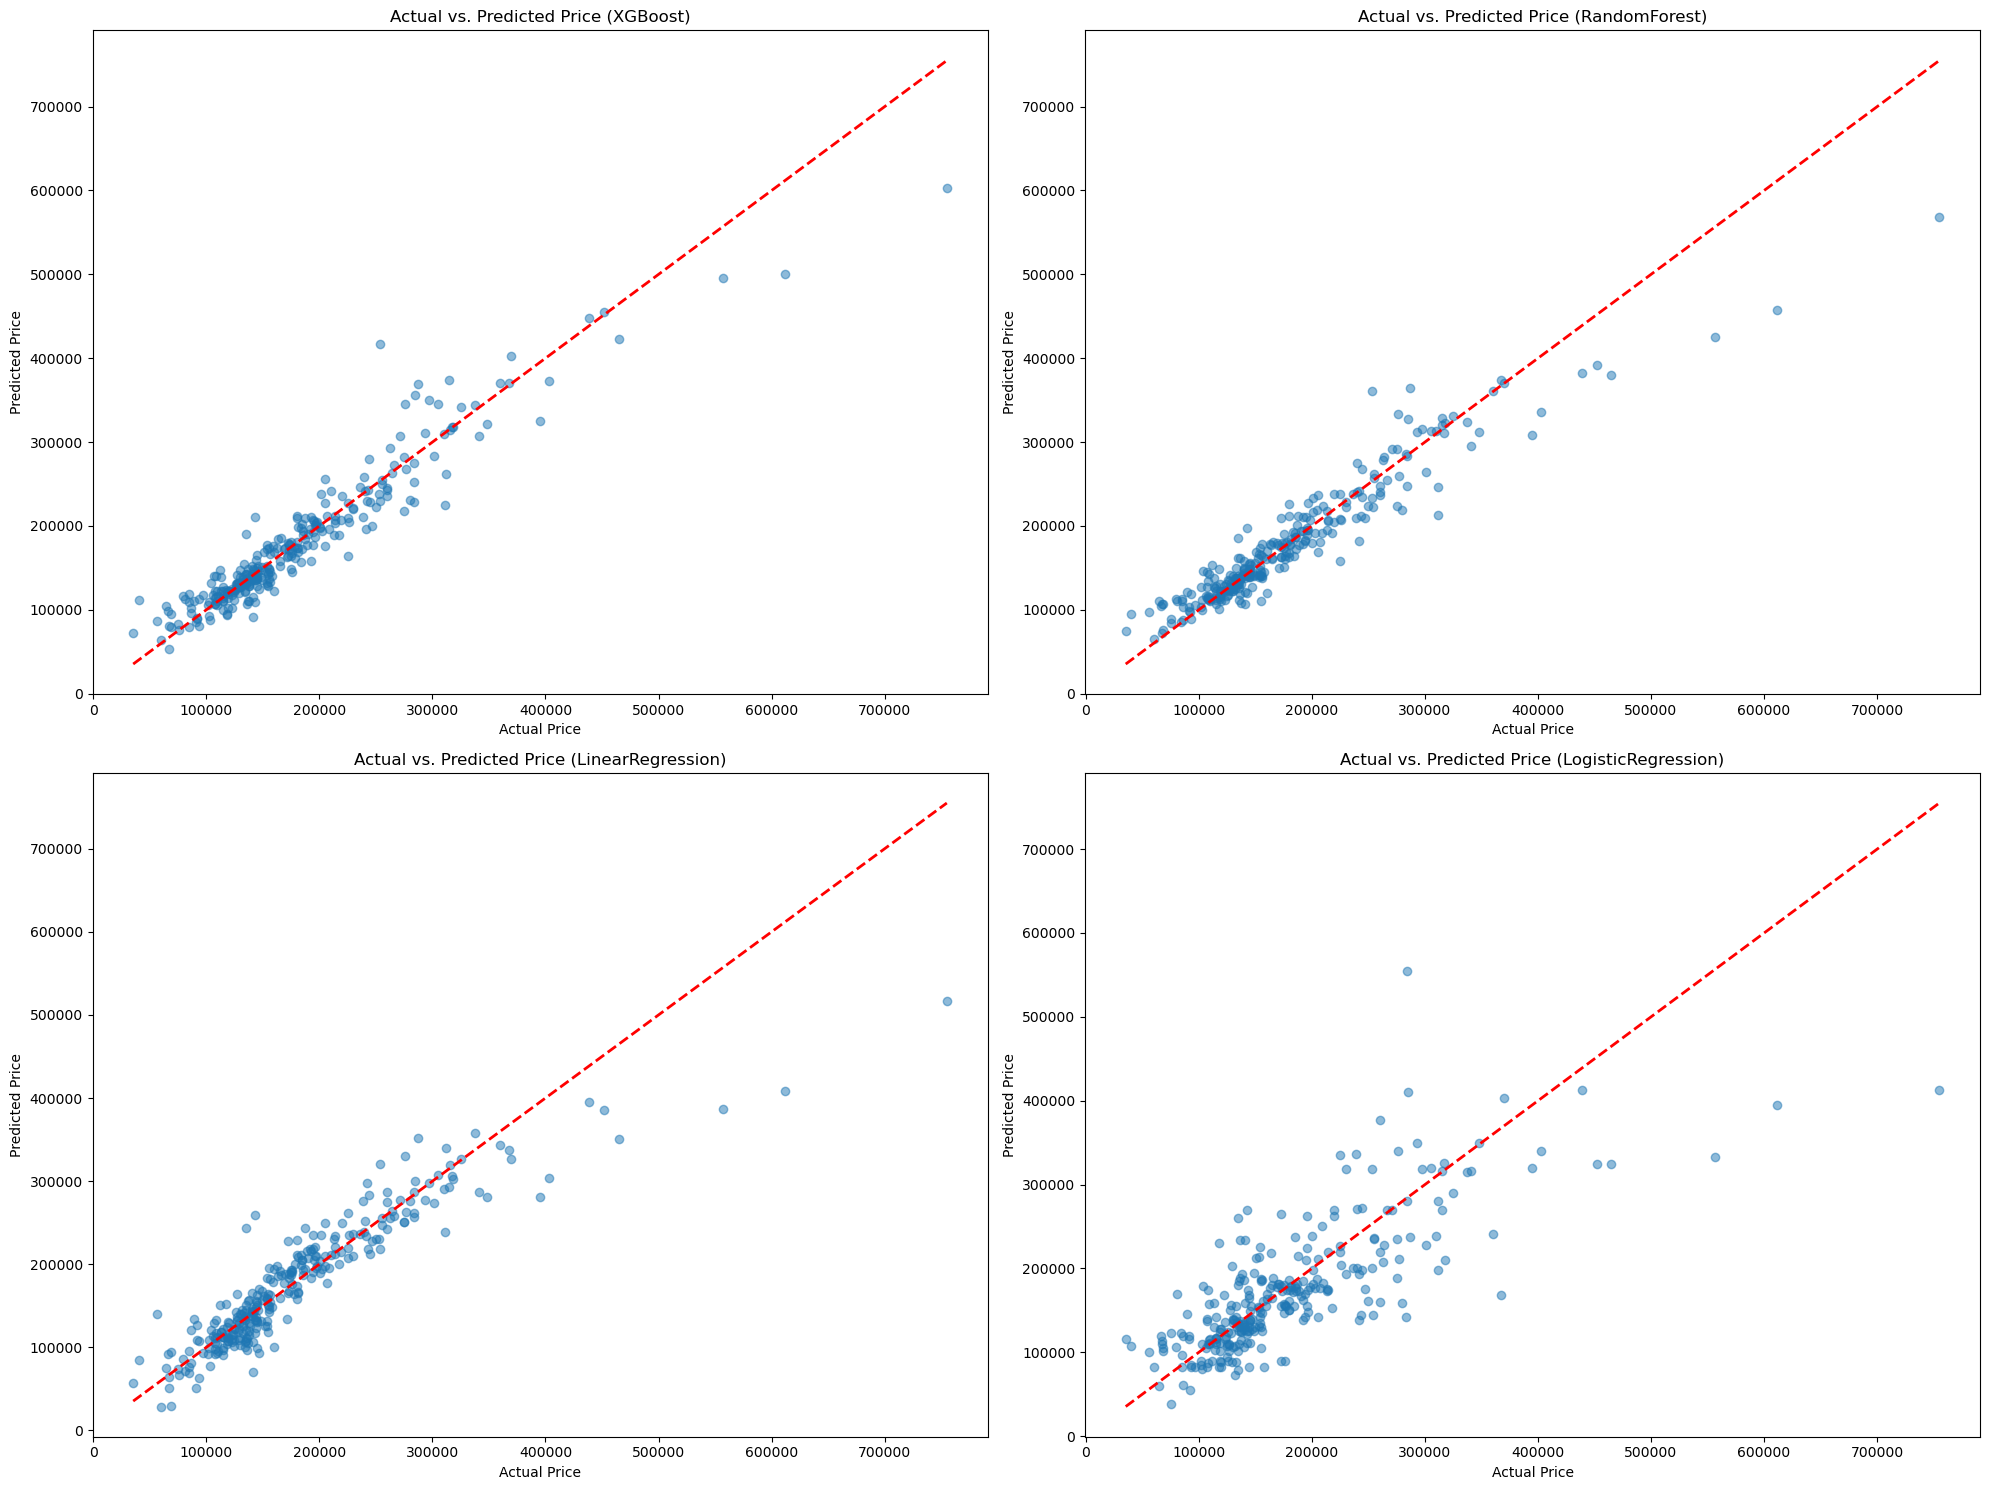

In [30]:
models = {
    'XGBoost': y_pred_xgb,
    'RandomForest': y_pred_rf,
    'LinearRegression': y_pred_lr,
    'LogisticRegression': y_pred_logistic
}

plt.figure(figsize=(20, 15))

for i, (model_name, y_pred) in enumerate(models.items(), 1):
    plt.subplot(2, 2, i)
    plt.scatter(y_val, y_pred, alpha=0.5)
    plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title(f'Actual vs. Predicted Price ({model_name})')

plt.tight_layout()
plt.show()

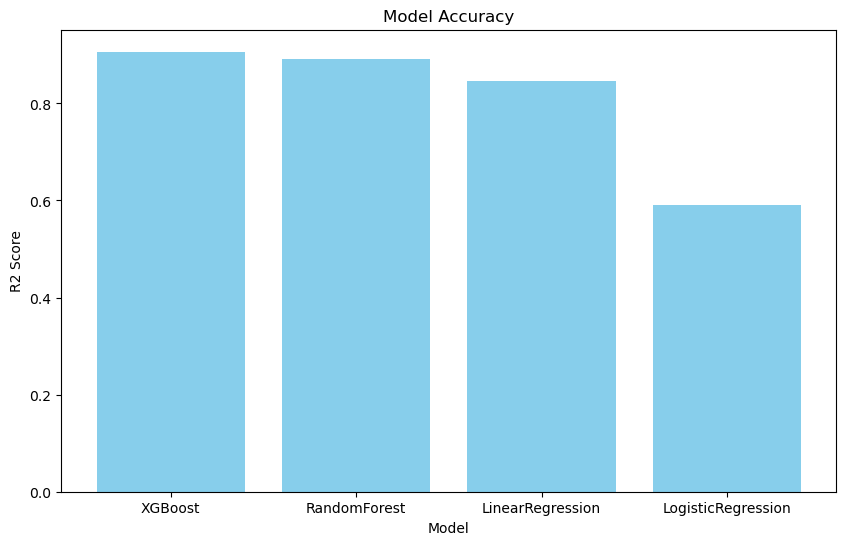

In [31]:
#plot accuracy of the models    
plt.figure(figsize=(10, 6))
models = ['XGBoost', 'RandomForest', 'LinearRegression', 'LogisticRegression']
accuracy = [r2_xgb, r2_rf, r2_lr, r2_logistic]
plt.bar(models, accuracy, color='skyblue')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.title('Model Accuracy')
plt.show()

In [32]:
submission = pd.DataFrame({'Id': df_test['Id'], 'SalePrice': y_test_pred})
submission.to_csv('submission.csv', index=False)
submission.head()

,Id,SalePrice
0,1461,141090.453125
1,1462,158549.765625
2,1463,180000.625000
3,1464,189993.593750
4,1465,198218.484375
